In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Models 

Here we implement our model iteration. We'll be investigating the performance of a Naive Bayes Classifier, A Logistic Regression Classifier, XGBoost Classifier, and a Neural Net. 

In [2]:
raw_data = pd.read_csv("../data/to_neural_net.csv")
data = raw_data.drop(columns = ["path","landmarks"])

In [3]:
def encode_variables(dataset,target):
    encoder = LabelEncoder()
    encoder.fit(dataset[target])
    dataset[target+"_encoded"] = encoder.transform(dataset[target])
    return dataset.drop(columns = [target],inplace=True)

In [4]:
encode_variables(data,"ethnicity")
encode_variables(data,"gender")

In [5]:
data['age_encoded'] = pd.cut(x=data['age'], 
                                bins=np.arange(0,130,10), 
                                labels = np.arange(12))
data.drop(columns=["age"],inplace=True)

In [6]:
data.head()

,nose2lip,lip2chin,len_between_eyes,left_eyelid_len,right_eyelid_len,nose_width,size_of_mouth,nose_len,bottom_lip_width,left_eye_size,right_eye_size,ethnicity_encoded,gender_encoded,age_encoded
0,0.127843,0.172767,0.237232,0.187906,0.179991,0.153473,0.274431,0.283629,0.060333,0.145301,0.109268,0,1,0
1,0.115510,0.146110,0.275589,0.212916,0.201710,0.155617,0.248926,0.263344,0.078643,0.122885,0.084790,0,1,0
2,0.093780,0.214220,0.256911,0.193784,0.204183,0.151439,0.279955,0.264790,0.077230,0.121487,0.094426,0,1,0
3,0.087586,0.221280,0.266966,0.170970,0.172216,0.181050,0.357491,0.256329,0.069628,0.121071,0.074953,0,1,0
4,0.093075,0.274444,0.275523,0.153957,0.150599,0.191064,0.422118,0.252346,0.054845,0.095940,0.049664,0,1,0


C:\Users\19168\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\19168\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\19168\anaconda3\lib\site-packages\sklearn\linear

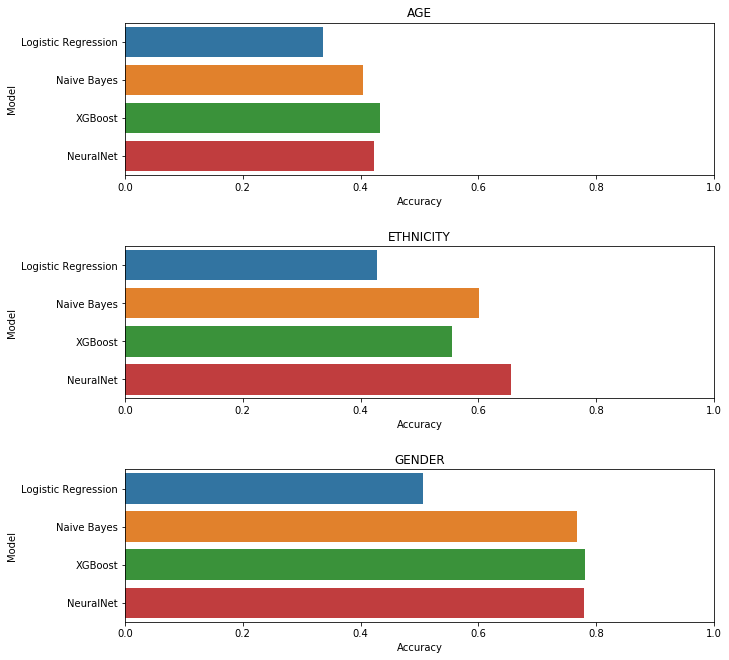

In [9]:
def run_analysis(df,targets):
    fig,axs = plt.subplots(3,figsize=(10,10))
    plt.tight_layout(pad=5)
    neural = MLPClassifier(hidden_layer_sizes = (10, 10), max_iter=100, alpha=0.0001,solver='lbfgs', verbose=10,tol=0.000000001)
    logistic = LogisticRegression(penalty="l2")
    models = [MultinomialNB(),logistic,neural,XGBClassifier()]
    model_names = ["Logistic Regression","Naive Bayes","XGBoost","NeuralNet"]
    for col,target in enumerate(targets):
        accuracies = []
        for n,model in enumerate(models):
            if target == "gender_encoded" and n==3:
                model = XGBClassifier(objective="binary:logistic") 
            y = df[target]
            X = df.drop(columns=targets)
            if target == "ethinicity_encoded":
                X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,stratify=X["ethnicity_encoded"])
                
            X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3)
            
            model.fit(X_train,y_train)
            accuracies.append(accuracy_score(y_test,model.predict(X_test)))
        sns.barplot(accuracies,model_names,ax=axs[col])
        axs[col].set_xlim(0,1)
        axs[col].set_xlabel("Accuracy")
        axs[col].set_ylabel("Model")
        axs[col].set_title(target.split("_")[0].upper())
    plt.show()
    return
            
run_analysis(data,["age_encoded","ethnicity_encoded","gender_encoded"])
    